In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, cohen_kappa_score
from sklearn.metrics import accuracy_score, f1_score
pd.set_option('display.max_columns',50)
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report



from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

import xgboost as xgb



In [116]:
import csv
df = pd.read_csv(r'C:\Users\PGuhan\Desktop\PG - DSE\Project\Health Insurance Lead Prediction.csv')
df.head()             

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3,1.0,16,10404.0,0


In [117]:
df.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [119]:
df.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

<AxesSubplot:>

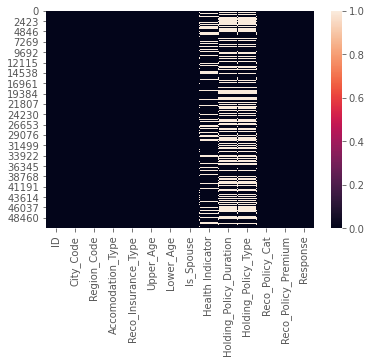

In [120]:
# Heatmap showing missing values before missing value treatment

sns.heatmap(df.isnull())

In [121]:
nonclients = ['Holding_Policy_Duration','Holding_Policy_Type']
for col in nonclients:
    df[col] = df[col].fillna(0)

In [122]:
df['Health Indicator'] = df['Health Indicator'].fillna(df['Health Indicator'].mode()[0])

With many of these prospects not clearly identified as current clients, its safe to assume that null values in the 'Policy Duration' and 'Policy Type' columns are tied to non existing accounts and may be filled with zeros.

# Feature Engineering

Convert to numerical: Holding_Policy_Duration

Feature engineer long term customers
Convert '14+' to '15' / convert to numerical

Categorical Features

In [123]:
df['Long_Term_Cust'] = df['Holding_Policy_Duration'].apply(lambda x: 'Yes' if x == '14+' else 'No')

In [124]:
df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].replace('14+',15).astype(float).astype(int)

Renaming Features

In [125]:
df.rename(columns={'Is_Spouse':'Married','Health Indicator':'Health_Indicator'},inplace=True)

In [126]:
df['Avg_Age'] = (df['Upper_Age'] + df['Lower_Age']) / 2

In [127]:
# feature engineering
df['Prim_Prem_Ratio'] = df['Reco_Policy_Premium'] / df['Upper_Age']


In [128]:
#feature selection
df2 = df.copy()
df.drop(['ID','Region_Code','Upper_Age','Lower_Age'],axis=1,inplace=True)


In [129]:
numcols = df.select_dtypes('number').columns
for col in numcols:
    df[col] = df[col].astype(int)

In [130]:
vals = {'Rented':1,'Owned':2,'Individual':1,'Joint':2,'No':0,'Yes':1}
cols = ['Accomodation_Type','Reco_Insurance_Type','Married','Long_Term_Cust']

for col in cols:
    df[col] = df[col].replace(vals)

Features 'Accommodation Type', 'Reco Insurance Type', 'Is Spouse' will be converted to binary (0 and 1).



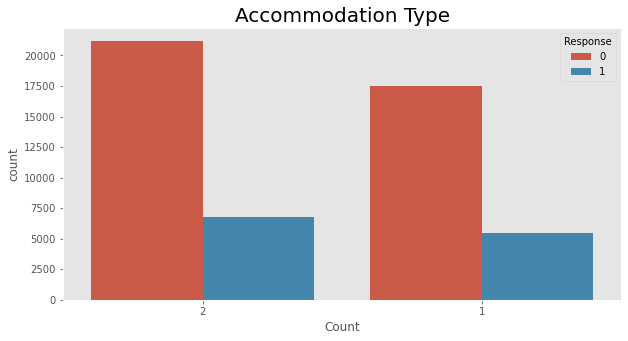

In [131]:
# Univariate & Bivariate analysis

# Analysis of Categorical Variables:
# In the below plots, each of the categorical variables are analysed individually.

plt.subplots(figsize=(10,5))
sns.countplot(x="Accomodation_Type", data=df,hue='Response',order = df['Accomodation_Type'].value_counts().index)
plt.grid(False)
plt.xlabel('Count')
plt.title('Accommodation Type',fontsize=20)
plt.show()

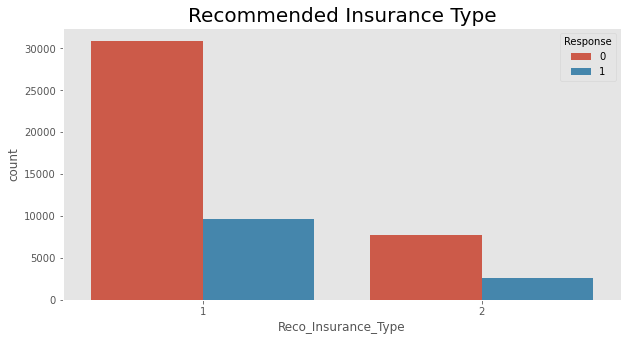

In [132]:
# Recommended Insurance Type

plt.subplots(figsize=(10,5))
sns.countplot(x="Reco_Insurance_Type", data=df,hue='Response', order = df['Reco_Insurance_Type'].value_counts().index)
plt.grid(False)
plt.title('Recommended Insurance Type',fontsize=20)
plt.show()


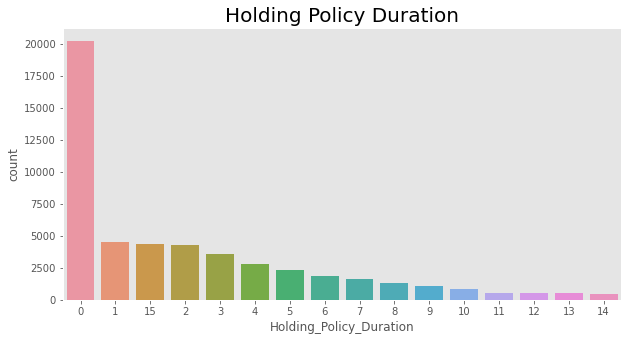

In [133]:
# Holding Policy Duration:

plt.subplots(figsize=(10,5))
sns.countplot(x="Holding_Policy_Duration", data=df, order = df['Holding_Policy_Duration'].value_counts().index)
plt.grid(False)
plt.title('Holding Policy Duration',fontsize=20)
plt.show()


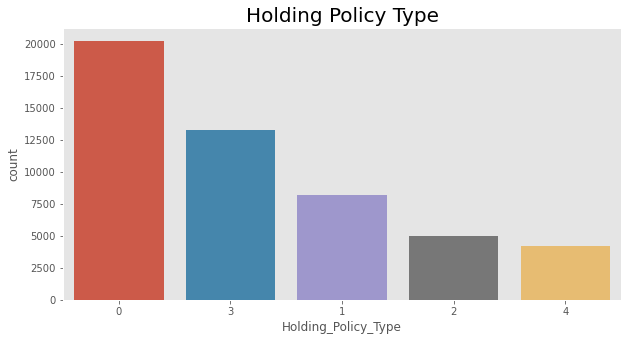

In [134]:
# Holding Policy Type:

plt.subplots(figsize=(10,5))
sns.countplot(x="Holding_Policy_Type", data=df, order = df['Holding_Policy_Type'].value_counts().index)
plt.grid(False)
plt.title('Holding Policy Type',fontsize=20)
plt.show()


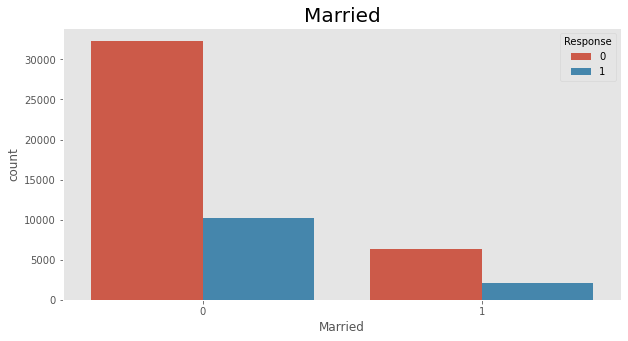

In [135]:
# Is Spouse

plt.subplots(figsize=(10,5))
sns.countplot(x="Married", data=df,hue='Response', order = df['Married'].value_counts().index)
plt.grid(False)
plt.title('Married',fontsize=20)
plt.show()


<AxesSubplot:xlabel='Reco_Policy_Premium', ylabel='Avg_Age'>

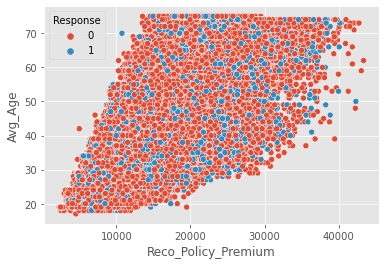

In [136]:
# Analysis of Numerical Variables

# Upper Age vs Policy Premium

sns.scatterplot(x=df.Reco_Policy_Premium,y=df.Avg_Age,hue=df.Response)


In [137]:
# Lower Age vs Policy Premium

# sns.scatterplot(x=df.Reco_Policy_Premium,y=df.Lower_Age,hue=df.Response)

<AxesSubplot:xlabel='Reco_Policy_Cat', ylabel='Density'>

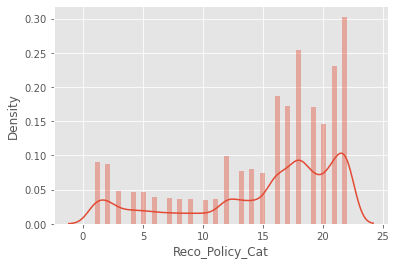

In [138]:
# Recommended Policy Category

sns.distplot(df.Reco_Policy_Cat)

In [139]:
ordinal = ['Holding_Policy_Type','Reco_Policy_Cat']
for col in ordinal:
    df[col] = df[col].astype('O')

<AxesSubplot:>

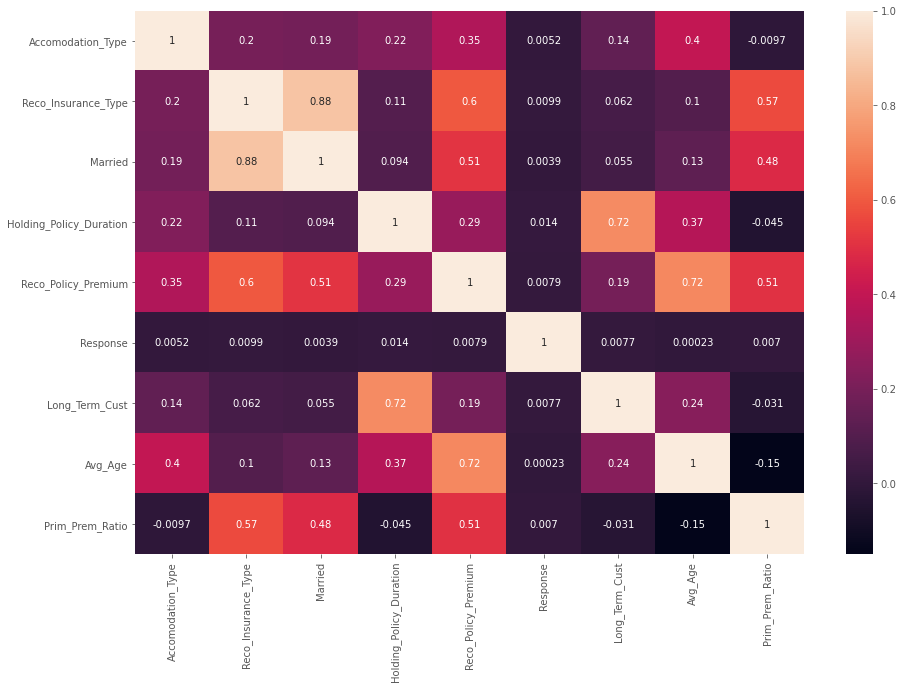

In [140]:
# MULTIVARIATE ANALYSIS

plt.figure(figsize=(15,10))

sns.heatmap(df.corr(),annot = True)


In [141]:
df.drop(['Married'],axis=1,inplace=True)

Final feature selection due to multicollinearity.

In [142]:
targetdf = df.groupby('Response').mean().head()
targetdf.style.background_gradient(cmap='Reds')

,Accomodation_Type,Reco_Insurance_Type,Holding_Policy_Duration,Reco_Policy_Premium,Long_Term_Cust,Avg_Age,Prim_Prem_Ratio
Response,,,,,,,
0,1.547876,1.201096,3.668554,14154.494816,0.083986,43.738888,317.916712
1,1.553936,1.210419,3.826194,14277.072406,0.089033,43.748219,319.431649


Customers who elect to receive additional information typically hold existing policies longer and are classified under a larger policy category with a slightly larger premium.

In [143]:
cat_vars = [var for var in df.columns if df[var].dtype == 'O']


In [144]:
def replace_categories(df, var, target):
    # Order variable categories | lowest to highest against target (price)
    ordered_labels = df.groupby([var])[target].mean().sort_values().index
    # Dictionary of ordered categories to integer values
    ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}
    # Replace the categorical strings by integers using dictionary
    df[var] = df[var].map(ordinal_label)
for var in cat_vars:
    replace_categories(df, var, 'Avg_Age')

In [145]:
labelencoder = preprocessing.LabelEncoder()
scaler = preprocessing.StandardScaler()

In [146]:
df['City_Code'] = labelencoder.fit_transform(df['City_Code'])
dfscaled = scaler.fit_transform(df)


In [147]:
df.dtypes

City_Code                  int64
Accomodation_Type          int64
Reco_Insurance_Type        int64
Health_Indicator           int64
Holding_Policy_Duration    int32
Holding_Policy_Type        int64
Reco_Policy_Cat            int64
Reco_Policy_Premium        int32
Response                   int32
Long_Term_Cust             int64
Avg_Age                    int32
Prim_Prem_Ratio            int32
dtype: object

In [148]:
df.isnull().sum()

City_Code                  0
Accomodation_Type          0
Reco_Insurance_Type        0
Health_Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
Long_Term_Cust             0
Avg_Age                    0
Prim_Prem_Ratio            0
dtype: int64

<AxesSubplot:>

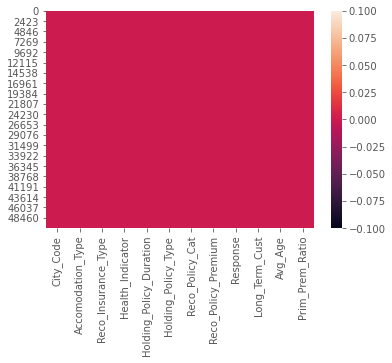

In [149]:
# Heatmap after treating missing values

sns.heatmap(df.isnull())

In [150]:
x=df.drop(['Response'],axis=1) #contain all  independent variable
y=df['Response']           #dependent variable

[0.13485792 0.01141242 0.0060506  0.08010035 0.06689484 0.03787572
 0.12488597 0.18955444 0.00256313 0.15828666 0.18751794]


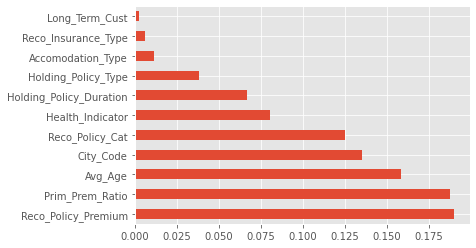

In [151]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based clas
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

We can remove less important features from the data set

In [152]:
x=x.drop(['Long_Term_Cust','Reco_Insurance_Type'],axis=1)

Handling imbalanced data

When observation in one class is higher than the observation in other classes then there exists a class imbalance. We can clearly see that there is a huge difference between the data set. Solving this issue we use resampling technique

Original dataset shape Counter({0: 38673, 1: 12209})
Resampled dataset shape Counter({0: 38673, 1: 38673})


<AxesSubplot:xlabel='Response', ylabel='count'>

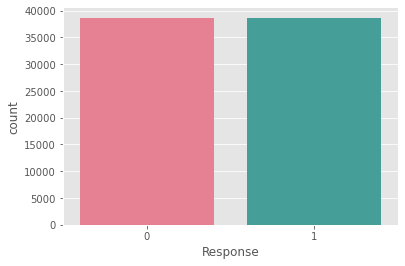

In [153]:
randomsample=  RandomOverSampler()
x_new,y_new=randomsample.fit_resample(x,y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new,palette='husl')

spliting of data into train and test data


In [154]:


#dividing the dataset into training and testing
xtrain,xtest,ytrain,ytest=train_test_split(x_new,y_new,test_size=.30,random_state=0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

(54142, 9) (23204, 9) (54142,) (23204,)


# Model

# Logistic regression

In [155]:
model=LogisticRegression()
model=model.fit(xtrain,ytrain)
pred=model.predict(xtest)
lr_probability =model.predict_proba(xtest)[:,1]


acc_lr=accuracy_score(ytest,pred)
recall_lr=recall_score(ytest,pred)
precision_lr=precision_score(ytest,pred)
f1score_lr=f1_score(ytest,pred)
AUC_LR=roc_auc_score(pred,ytest)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(ytest,pred))
print("ROC_AUC Score:",AUC_LR)

Accuracy :  0.5069815549043268
ROC_AUC Score: 0.5076609072847242


Grid Search CV - Colab

In [156]:
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

           0       0.61      0.50      0.55     13969
           1       0.41      0.51      0.45      9235

    accuracy                           0.51     23204
   macro avg       0.51      0.51      0.50     23204
weighted avg       0.53      0.51      0.51     23204



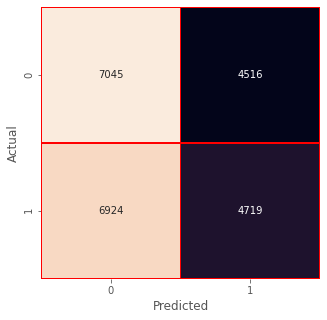

In [157]:
cm=confusion_matrix(ytest,pred)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax,cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Random Forest Classifier

In [158]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest=randomforest.fit(xtrain, ytrain)
y_pred = randomforest.predict(xtest)
RF_probability = randomforest.predict_proba(xtest)[:,1]



AUC_RF=roc_auc_score(y_pred,ytest)
acc_rf=accuracy_score(ytest,y_pred)
recall_rf=recall_score(ytest,y_pred)
precision_rf=precision_score(ytest,y_pred)
f1score_rf=f1_score(ytest,y_pred)

print(accuracy_score(y_pred,ytest))
print("ROC_AUC Score:",AUC_RF)

0.8846750560248233
ROC_AUC Score: 0.886297950091076


In [159]:
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     10823
           1       0.92      0.86      0.89     12381

    accuracy                           0.88     23204
   macro avg       0.88      0.89      0.88     23204
weighted avg       0.89      0.88      0.88     23204



Text(0.5, 0, 'Random Forest Feature Importance')

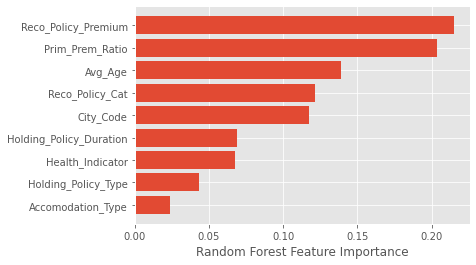

In [160]:
sorted_idx = randomforest.feature_importances_.argsort()
plt.barh(x.columns[sorted_idx], randomforest.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# ROC CURVE

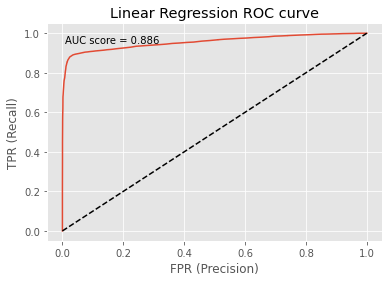

In [161]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest, RF_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.text(s='AUC score = '+str(round(AUC_RF,3)),x=0.01,y=0.95)
plt.show()

# Confusion Matrix

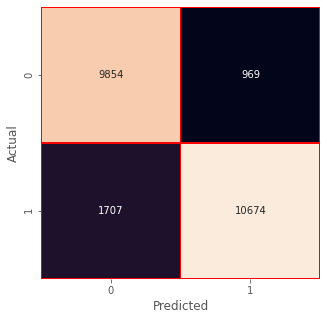

In [162]:
cm=confusion_matrix(y_pred,ytest)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax,cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [163]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
XGB_fit=xgb.fit(xtrain, ytrain)
y_predict = XGB_fit.predict(xtest)
XGB_probability = XGB_fit.predict_proba(xtest)[:,1]

acc_xgb=accuracy_score(ytest,y_predict)
recall_xgb=recall_score(ytest,y_predict)
precision_xgb=precision_score(ytest,y_predict)
f1score_xgb=f1_score(ytest,y_predict)

AUC_xgb=roc_auc_score(y_predict,ytest)


print(accuracy_score(y_predict,ytest))
print("ROC_AUC Score:",AUC_xgb)

0.6850543009825892
ROC_AUC Score: 0.6883979859228347


In [164]:
print(classification_report(y_predict,ytest))

              precision    recall  f1-score   support

           0       0.62      0.71      0.66     10001
           1       0.75      0.66      0.71     13203

    accuracy                           0.69     23204
   macro avg       0.68      0.69      0.68     23204
weighted avg       0.69      0.69      0.69     23204



In [165]:
# instantiate the 'AdaBoostClassifier'
# n_estimators: number of estimators at which boosting is terminated
# pass the 'random_state' to obtain the same results for each code implementation
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

# fit the model using fit() on train data
ada_model.fit(xtrain, ytrain)

AdaBoostClassifier(n_estimators=40, random_state=10)

In [166]:

y_predict = ada_model.predict(xtest)
ada_model_probability = ada_model.predict_proba(xtest)[:,1]

acc_ada=accuracy_score(ytest,y_predict)
recall_ada=recall_score(ytest,y_predict)
precision_ada=precision_score(ytest,y_predict)
f1score_ada=f1_score(ytest,y_predict)

AUC_ada=roc_auc_score(y_predict,ytest)


print(accuracy_score(y_predict,ytest))
print("ROC_AUC Score:",AUC_ada)

0.5888208929494915
ROC_AUC Score: 0.5888346004253876


In [167]:
# create a generalized function to calculate the metrics values for train set
def get_train_report(model):
    
    # for training set:
    # train_pred: prediction made by the model on the train dataset 'X_train'
    # y_train: actual values of the target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(xtrain)

    # return the performace measures on train set
    return(classification_report(ytrain, train_pred))

# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(xtest)

    # return the performace measures on test set
    return(classification_report(ytest, test_pred))

In [168]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the AdaBoost model to the function
test_report = get_test_report(ada_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.59      0.58      0.58     11561
           1       0.59      0.60      0.59     11643

    accuracy                           0.59     23204
   macro avg       0.59      0.59      0.59     23204
weighted avg       0.59      0.59      0.59     23204



In [169]:
# instantiate the 'GradientBoostingClassifier' 
# n_estimators: number of estimators to consider
# 'max_depth': assigns maximum depth of the tree
# pass the 'random_state' to obtain the same results for each code implementation
gboost_model = GradientBoostingClassifier(n_estimators = 50, max_depth = 10, random_state = 10)

# fit the model using fit() on train data
gboost_model.fit(xtrain, ytrain)

GradientBoostingClassifier(max_depth=10, n_estimators=50, random_state=10)

In [170]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the gradient boosting model to the function
train_report = get_train_report(gboost_model)

# print the performance measures
print(train_report)

              precision    recall  f1-score   support

           0       0.84      0.72      0.77     27112
           1       0.75      0.86      0.80     27030

    accuracy                           0.79     54142
   macro avg       0.80      0.79      0.79     54142
weighted avg       0.80      0.79      0.79     54142



In [171]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the gradient boosting model to the function
test_report = get_test_report(gboost_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.76      0.62      0.68     11561
           1       0.68      0.81      0.74     11643

    accuracy                           0.71     23204
   macro avg       0.72      0.71      0.71     23204
weighted avg       0.72      0.71      0.71     23204



In [172]:

y_predict = gboost_model.predict(xtest)
gboost_model_probability = gboost_model.predict_proba(xtest)[:,1]

acc_gb=accuracy_score(ytest,y_predict)
recall_gb=recall_score(ytest,y_predict)
precision_gb=precision_score(ytest,y_predict)
f1score_gb=f1_score(ytest,y_predict)

AUC_gb=roc_auc_score(y_predict,ytest)


print(accuracy_score(y_predict,ytest))
print("ROC_AUC Score:",AUC_gb)

0.7114290639544906
ROC_AUC Score: 0.7192834007670671


In [173]:
# consider the various algorithms as base learners
base_learners = [('rf_model', RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'sqrt', 
                                                     max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 2, 
                                                     n_estimators = 50, random_state = 10)),
                 ('KNN_model', KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')),
                 ('NB_model', GaussianNB())]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB())

# fit the model on train dataset
stack_model.fit(xtrain, ytrain)

StackingClassifier(estimators=[('rf_model',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=10,
                                                       max_leaf_nodes=8,
                                                       min_samples_leaf=5,
                                                       n_estimators=50,
                                                       random_state=10)),
                               ('KNN_model',
                                KNeighborsClassifier(metric='euclidean')),
                               ('NB_model', GaussianNB())],
                   final_estimator=GaussianNB())

In [174]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the XGBoost model to the function
test_report = get_test_report(stack_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.69      0.47      0.56     11561
           1       0.60      0.80      0.68     11643

    accuracy                           0.63     23204
   macro avg       0.65      0.63      0.62     23204
weighted avg       0.65      0.63      0.62     23204



In [175]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the XGBoost model to the function
train_report = get_train_report(stack_model)

# print the performance measures
print(train_report)

              precision    recall  f1-score   support

           0       0.82      0.57      0.67     27112
           1       0.67      0.87      0.76     27030

    accuracy                           0.72     54142
   macro avg       0.74      0.72      0.71     54142
weighted avg       0.74      0.72      0.71     54142



# Comparing Model

In [176]:
ind=['Logistic regression','Randomforest','XGBClassifier','Ada Boost','Gradient Boost']
data={"Accuracy":[acc_lr,acc_rf,acc_xgb,acc_ada,acc_gb],"Recall":[recall_lr,recall_rf,recall_xgb,recall_ada,recall_gb],"Precision":[precision_lr,precision_rf,precision_xgb,precision_ada,precision_gb],
    'f1_score':[f1score_lr,f1score_rf,f1score_xgb,f1score_ada,f1score_gb],"ROC_AUC":[AUC_LR,AUC_RF,AUC_xgb,AUC_ada,AUC_gb]}
result=pd.DataFrame(data=data,index=ind)



The ML model for the problem statement was created using python with the help of the dataset, and the ML model created with Random Forest and XGBClassifier models performed better than Logistics Regression model. Thus, for the given problem, the models created by Random Forest and XGBClassifier.

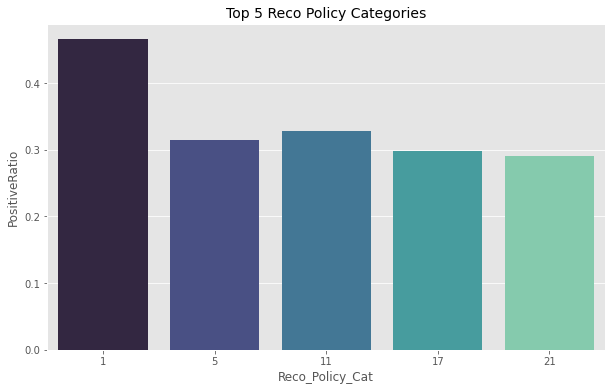

In [177]:
RPC = df.groupby(['Reco_Policy_Cat','Response'])['Response'].count().unstack()
RPC['PositiveRatio'] = RPC[1] / (RPC[1] + RPC[0])
RPC = RPC.sort_values(by='PositiveRatio', ascending=False)[:5].reset_index()
# RPC
fig, ax = plt.subplots(figsize=(10,6))
plt.title('Top 5 Reco Policy Categories', fontdict={'fontsize': 14})
sns.barplot(data=RPC,x='Reco_Policy_Cat',y='PositiveRatio',palette='mako');
fig.savefig('top5categoryxresponse.jpg',dpi=200,bbox_inches='tight')

In [178]:
df['Premium(bin)'] = df['Reco_Policy_Premium'].apply(lambda x: '0-9999' if x < 10000
                                                     else '10000-14999' if x < 15000 
                                                     else '15000-19999' if x < 20000 
                                                     else '20000-24999' if x < 25000 
                                                     else '25000-29999' if x < 30000 
                                                     else '30000+')


In [179]:
df.to_csv('jobathondashboard.csv')

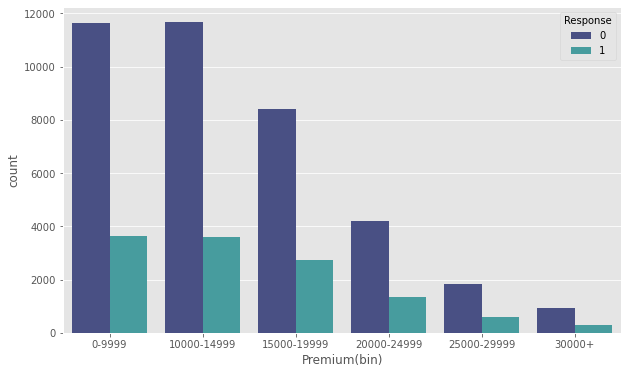

In [180]:
df = df.sort_values(['Premium(bin)'], ascending=True)
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=df,x='Premium(bin)',hue='Response',palette='mako');
fig.savefig('premiumbin.jpg',dpi=200,bbox_inches='tight')

In [181]:
PRE = df.groupby(['Premium(bin)','Response'])['Response'].count().unstack()
PRE['PositiveRatio'] = PRE[1] / (PRE[1] + PRE[0])
PRE = PRE.sort_values(by='PositiveRatio', ascending=False)
PRE

Response,0,1,PositiveRatio
Premium(bin),,,
25000-29999,1824,602,0.248145
15000-19999,8420,2733,0.245046
30000+,931,300,0.243704
20000-24999,4188,1333,0.241442
0-9999,11638,3642,0.238351
10000-14999,11672,3599,0.235675


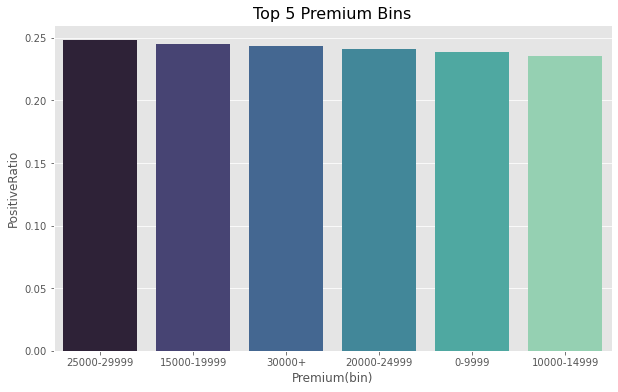

In [182]:
PRE = PRE.reset_index()
fig, ax = plt.subplots(figsize=(10,6))
plt.title('Top 5 Premium Bins', fontdict={'fontsize': 16})
sns.barplot(data=PRE,x='Premium(bin)',y='PositiveRatio',palette='mako');
fig.savefig('top5premiumbin.jpg',dpi=200,bbox_inches='tight')

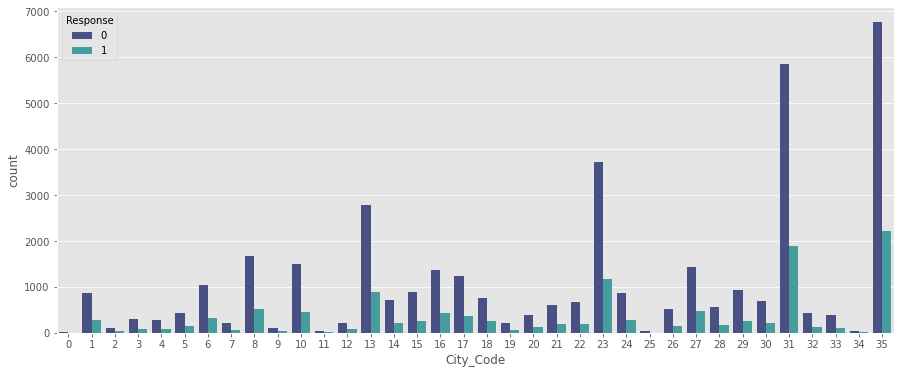

In [183]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(data=df,x='City_Code',hue='Response',palette='mako');
fig.savefig('citycode.jpg',dpi=200,bbox_inches='tight')

In [184]:
CITY = df.groupby(['City_Code','Response'])['Response'].count().unstack()
CITY['PositiveRatio'] = CITY[1] / (CITY[1] + CITY[0])
CITY = CITY.sort_values(by='PositiveRatio', ascending=False)[:11]
CITY

Response,0,1,PositiveRatio
City_Code,,,
34,40,18,0.310345
9,114,46,0.287500
11,40,16,0.285714
2,94,36,0.276923
5,431,156,0.265758
12,219,76,0.257627
18,750,255,0.253731
27,1426,484,0.253403
7,215,71,0.248252


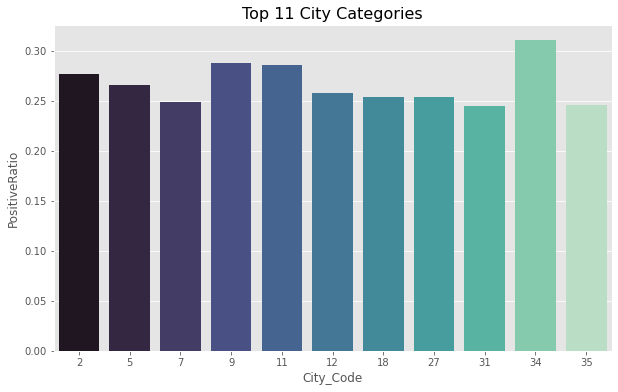

In [185]:
CITY = CITY.reset_index()
fig, ax = plt.subplots(figsize=(10,6))
plt.title('Top 11 City Categories', fontdict={'fontsize': 16})
sns.barplot(data=CITY,x='City_Code',y='PositiveRatio',palette='mako');
fig.savefig('top11citycode.jpg',dpi=200,bbox_inches='tight')